In [63]:
################
Name : Md Ziauddin Ridoy
Matriculation : 220100676

In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [65]:
import pandas as pd
df = pd.read_csv("iris.csv")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [66]:
iris_data = df[df.columns[0:4]]

In [67]:
##df_small_1_col = df.iloc[0:1]
df_small_1_col = df['sepal_length']
print(df_small_1_col)


##df_small_2_col = df.iloc[2]
df_small_2_col = df['sepal_width']
print(df_small_2_col)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [68]:
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [69]:
##################correlation coefficient

np.corrcoef(df_small_1_col,df_small_2_col)[0,1]


-0.11756978413300201

In [70]:
####To test if this correlation is statistically significant, we can
####calculate the p-value associated with the Pearson correlation coefficient by using
###the Scipy pearsonr() function, which returns the Pearson correlation coefficient along with the two-tailed p-value.

from scipy.stats.stats import pearsonr

pearsonr(df_small_1_col,df_small_2_col)


(-0.11756978413300205, 0.15189826071144918)

In [71]:
# computing the corrlation matrix
corMat = np.corrcoef(iris_data)

print(corMat)

[[1.         0.99599866 0.99997391 ... 0.65347343 0.6339168  0.63315839]
 [0.99599866 1.         0.99660709 ... 0.70898277 0.68625679 0.68483481]
 [0.99997391 0.99660709 1.         ... 0.65755616 0.63763128 0.6368058 ]
 ...
 [0.65347343 0.70898277 0.65755616 ... 1.         0.99570813 0.99446012]
 [0.6339168  0.68625679 0.63763128 ... 0.99570813 1.         0.99991588]
 [0.63315839 0.68483481 0.6368058  ... 0.99446012 0.99991588 1.        ]]


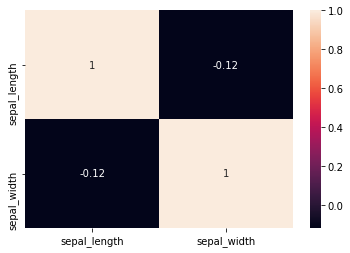

In [72]:
# taking all rows but only 2 columns
df_small_corr_123 = df.iloc[:,:2]

correlation_mat = df_small_corr_123.corr()

sn.heatmap(correlation_mat, annot = True)

plt.show()

In [73]:
standardized_iris_data = stats.zscore(iris_data)
print(standardized_iris_data)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [74]:
covMatrix = np.cov(standardized_iris_data,bias=True)
print (covMatrix)

[[ 0.941666    0.48205992  0.69852325 ... -0.431629   -0.11413313
  -0.32836239]
 [ 0.48205992  0.24699272  0.35970079 ... -0.22090979 -0.05352691
  -0.16478306]
 [ 0.69852325  0.35970079  0.53926419 ... -0.32151682 -0.03848546
  -0.20998656]
 ...
 [-0.431629   -0.22090979 -0.32151682 ...  0.20591306  0.06154607
   0.14633361]
 [-0.11413313 -0.05352691 -0.03848546 ...  0.06154607  0.13338841
   0.1101824 ]
 [-0.32836239 -0.16478306 -0.20998656 ...  0.14633361  0.1101824
   0.16849635]]


In [75]:
w,v=eig(covMatrix)
print('Eigen value:', w)
print('Eigen vector', v)

Eigen value: [ 7.23220489e+01+0.00000000e+00j  6.56435490e+00+0.00000000e+00j
  9.80636636e-01+0.00000000e+00j -3.71561662e-15+5.65741419e-15j
 -3.71561662e-15-5.65741419e-15j -6.11299309e-15+0.00000000e+00j
 -3.63059549e-15+3.94922612e-15j -3.63059549e-15-3.94922612e-15j
 -4.43203009e-15+0.00000000e+00j  2.53406117e-15+4.46020349e-15j
  2.53406117e-15-4.46020349e-15j  5.21272022e-15+0.00000000e+00j
  2.93394861e-15+3.23851660e-15j  2.93394861e-15-3.23851660e-15j
  4.56612744e-15+0.00000000e+00j  2.35210205e-15+2.95489045e-15j
  2.35210205e-15-2.95489045e-15j  3.86800550e-15+0.00000000e+00j
  3.71634365e-15+0.00000000e+00j -2.78186295e-15+2.22082693e-15j
 -2.78186295e-15-2.22082693e-15j -8.84707899e-16+3.27625005e-15j
 -8.84707899e-16-3.27625005e-15j  5.43966519e-16+3.29289595e-15j
  5.43966519e-16-3.29289595e-15j -3.46524528e-15+0.00000000e+00j
 -3.17784766e-15+0.00000000e+00j  2.20518412e-15+1.86776835e-15j
  2.20518412e-15-1.86776835e-15j -1.99607153e-15+1.49407396e-15j
 -1.99607153